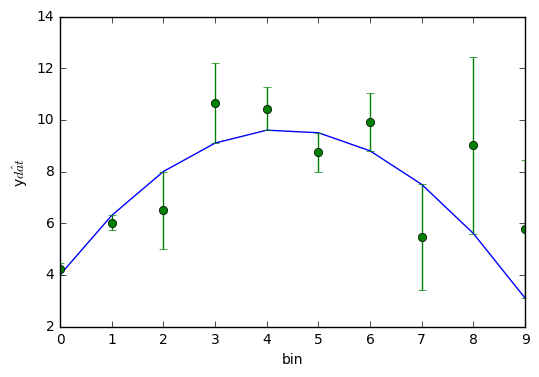

In [1]:
#CREDITOS DE IDEAS: SEBASTIEN FROMENTEAU
#DISCLAIMER: este programa fue el desarollado en la MACSS 2016 con Sebastien,
#se me hizo mucho mas completo que uno para una recta

#genera muestra de chi^2 
#ley = ax^2 + bx + c
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.special import erf
import math as mt

#valores reales de la constante
a=-0.3
b=2.6
c=4

#numero de puntos
ndf=10

#arreglos que siguen distribucion estandar

arr_sigma = np.random.rand(ndf)*1+1 #arreglo de la desviacion estandar
arr_errors = np.random.randn(ndf)*arr_sigma #errores gausianos de la observacion

arr_x = np.arange(0,ndf) #arreglo de bins


arr_val_model = a*np.power(arr_x,2) + b*arr_x + c #arreglo obtenido con la ley
arr_measure = arr_val_model + arr_errors #arreglo medido

plt.plot(arr_x, arr_val_model)
plt.errorbar(arr_x, arr_measure, yerr=arr_errors, fmt='o')

plt.xlabel('bin')
plt.ylabel('y$\^{dat}$')

plt.show()

np.savetxt('Example_chi2_2.txt', (arr_x, arr_measure, arr_sigma), delimiter=';' )

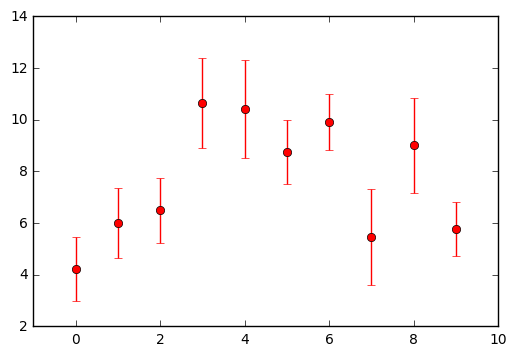

Results for a,b,c =  -0.206611570248 2.07438016529 4.15702479339


NameError: name 'sp' is not defined

In [4]:
x,y,err = np.loadtxt('Example_chi2_2.txt', delimiter=';')


nbb=122

tab_chi2 = np.zeros( (nbb, nbb, nbb) )

tab_a = np.linspace(-1, 5, nbb)
tab_b = np.linspace(-1, 5, nbb)
tab_c = np.linspace(-1, 5, nbb)

for i in range(0,nbb):
    for j in range(0,nbb):
        for k in range(0,nbb):
            
            tab_chi2[i,j,k] = np.sum( np.power(tab_a[i]*np.power(x,2) + tab_b[j]*x + tab_c[k] - y,2)/np.power(err,2) )

     
    
t_min = np.unravel_index(tab_chi2.argmin(), tab_chi2.shape)

print 'Results for a,b,c = ',tab_a[t_min[0]], tab_b[t_min[1]], tab_c[t_min[2]]

#Values for 1,2 and 3 sigma for a gaussian
val1=0.68268949  
val2=0.95449974  
val3=0.9973002

vals = np.zeros(3)
vals[0] = val1
vals[1] = val2
vals[2] = val3

index_sig = np.zeros(3, int)


dof = len(x)-3
nbs = 1000
tab_val = np.linspace(1,40, nbs)
tab_gi = np.zeros(nbs)
for i in range(len(tab_val)):
    tab_gi[i] = sp.special.gammainc(dof/2.,tab_val[i]/2)

for i in range(len(vals)):
    index_sig[i] =  int(round(np.argmin( abs(tab_gi - vals[i]) )) )
    print index_sig[i], tab_val[index_sig[i]]


print index_sig

levels = tab_val[index_sig]
print 'levels 1sima, 2sigma, 3 sigma', levels

#real values
a=-0.3
b=2.6
c=4




best_model = tab_a[t_min[0]]*np.power(x,2) + tab_b[t_min[1]]*x + tab_c[t_min[2]]
real_model = a*np.power(x,2) + b*x + c

plt.errorbar(x,y,err, fmt='o', color='r')
plt.plot(x, best_model, linewidth=2, color='blue', label='Best fit' )
plt.xlim(-1,11)
plt.plot(x, real_model, linewidth=2, color='y', label='Real')
plt.legend()
plt.show()

# PROBLEMA 2 
## teorema de bayes

Partiendo de:

$p(A,B)=p(B,A)\,\,\,\,\,\,\,\,\,\,\,\, (1) $

tenemos:

$P(A,B)= P(A)\cdot P(B|A): = P(B,A) = P(B)\cdot P(A|B)$

Despejando $P(A|B): $

$P(A|B)= \frac{P(A)\cdot P(B|A)}{P(B)}$